In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
def csv_import(csv_file):
    
    data = pd.read_csv(csv_file, parse_dates=['Dates'], dayfirst=True)
    dates = data['Dates']
    events = data['Events']
    
    return dates, events

In [3]:
def iso_filter(dataframe, isocode):
    data = dataframe[dataframe['iso_code'].str.contains(isocode)]
    return data

In [4]:
# Fonction to generate the timelines

def timeline(dates, events, x_axis_size, y_axis_size, font_size='15', graph_title='s', alignement='left'):
    
    fig, ax = plt.subplots(figsize=(x_axis_size, y_axis_size))
    levels = np.tile([-5, 5, -3, 3, -1, 1], int(np.ceil(len(dates) / 6)))[:len(dates)] # Determinate the size of the axis
    ax.set(title=graph_title) # Setting the title
    ax.vlines(dates, 0, levels, color='black') # Plot vertical lines
    ax.plot(dates, np.zeros_like(dates), "-o", color="black", markerfacecolor="w")  # Plotting the dates in the x-axis and adding the dot-like style
            
    for (d, l, r) in zip(dates, levels, events):
        ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l) * 3), 
        textcoords="offset points", horizontalalignment=alignement, 
        verticalalignment="bottom" if l > 0 else "top", fontsize=font_size) 
   
    # Format the axis with 15-days intervals.
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d %Y"))
    plt.setp(ax.get_xticklabels(), rotation=25, ha="center")
            
    # Remove y-axis and spines
    ax.yaxis.set_visible(False)
    ax.spines[["left", "top", "right"]].set_visible(False)

    ax.margins(y=(0.6)) #
    plt.show()
    

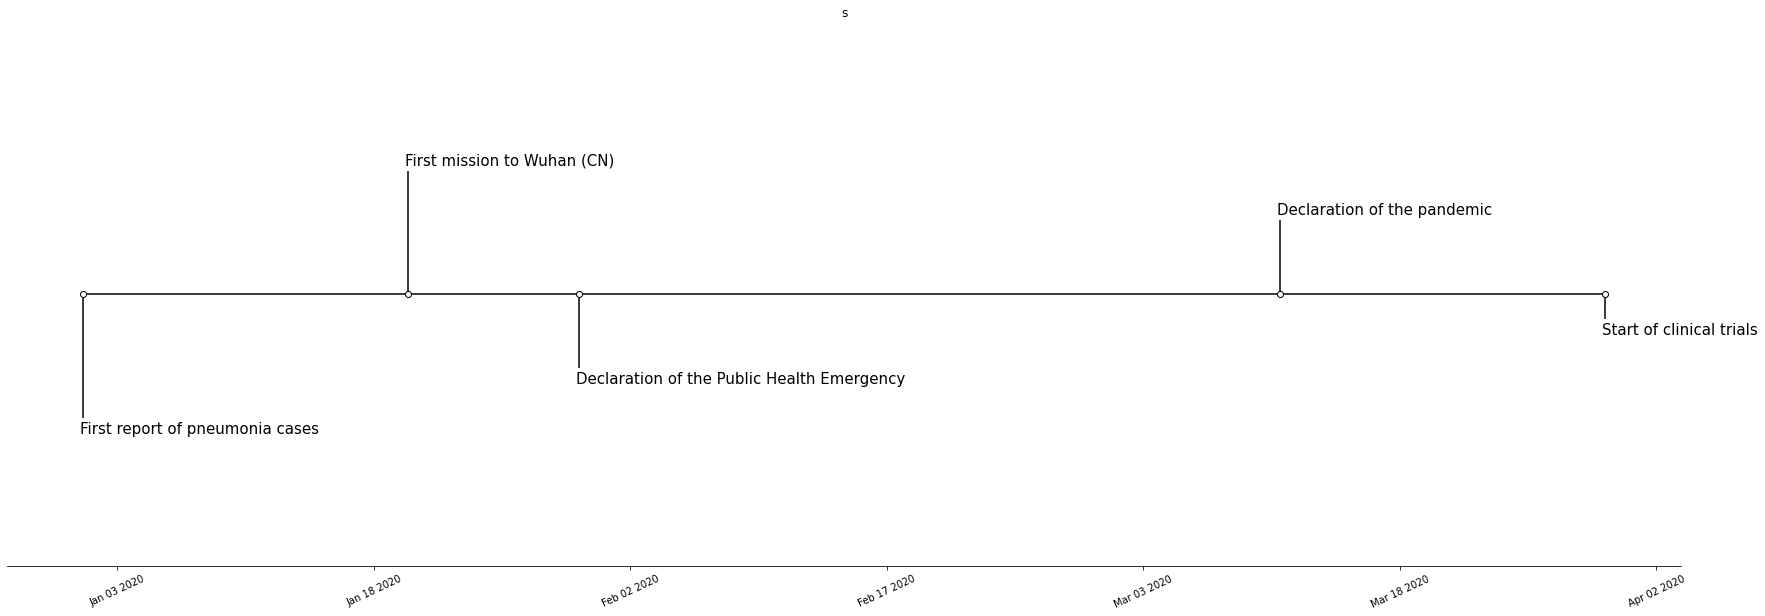

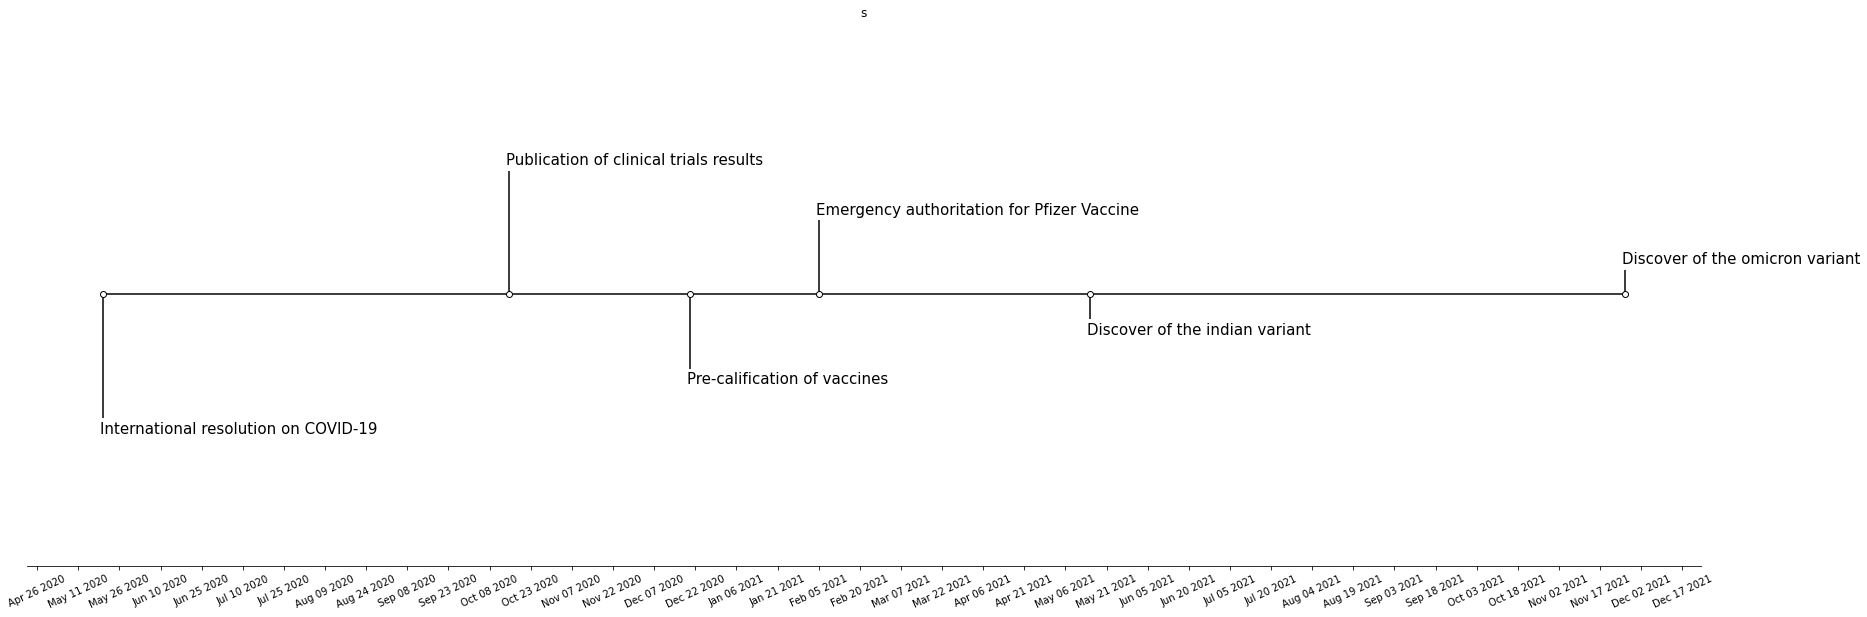

In [5]:
# WHO timeline

dates_who1, events_who1 = csv_import('WHO1.csv')
dates_who2, events_who2 = csv_import('WHO2.csv')
timeline(dates_who1, events_who1, 30, 10)
timeline(dates_who2, events_who2, 30, 10)

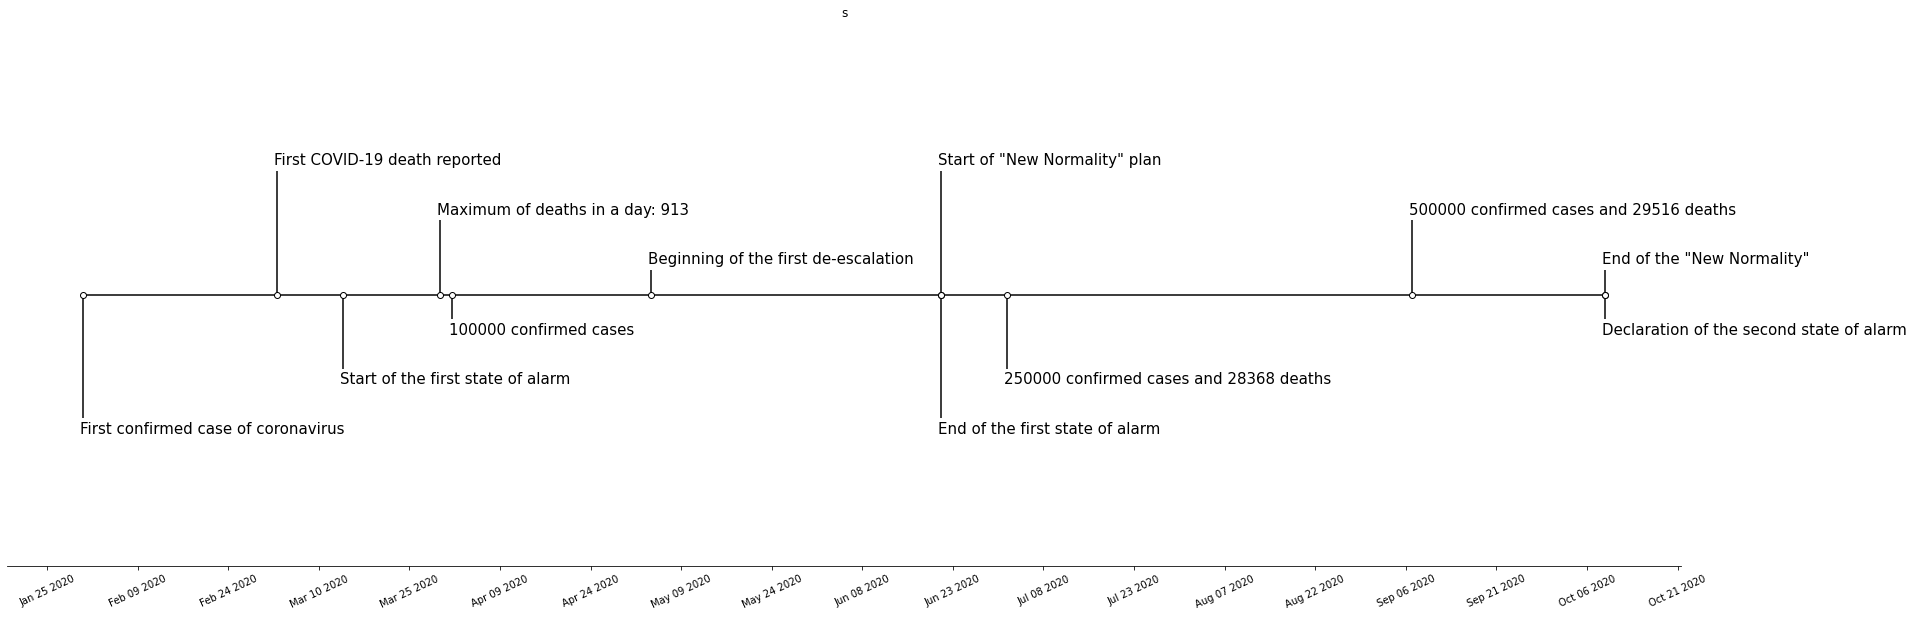

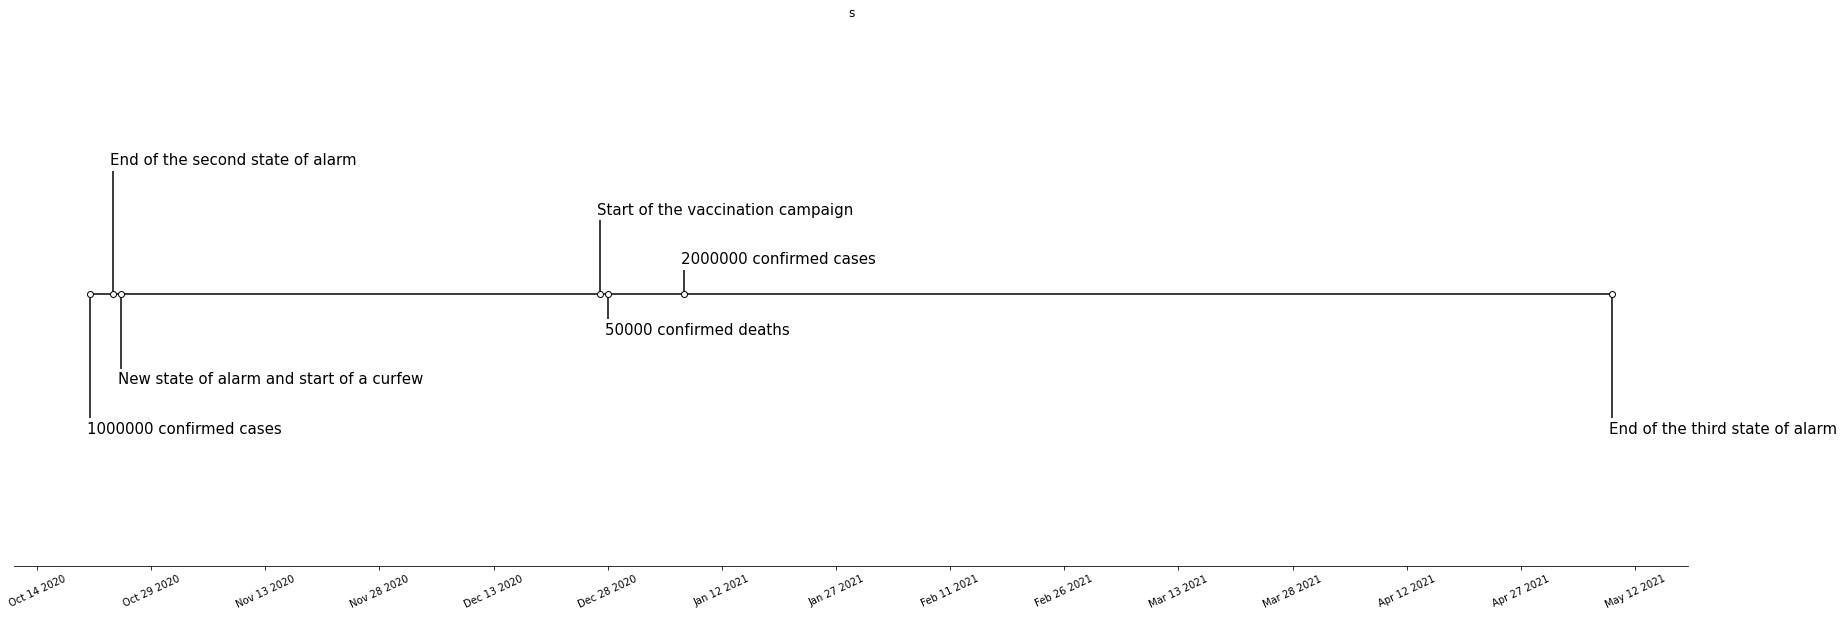

In [6]:
# Spain

dates_spain1, events_spain1 = csv_import('spain1.csv')
dates_spain2, events_spain2 = csv_import('spain2.csv')

timeline(dates_spain1, events_spain1, 30, 10)
timeline(dates_spain2, events_spain2, 30, 10)

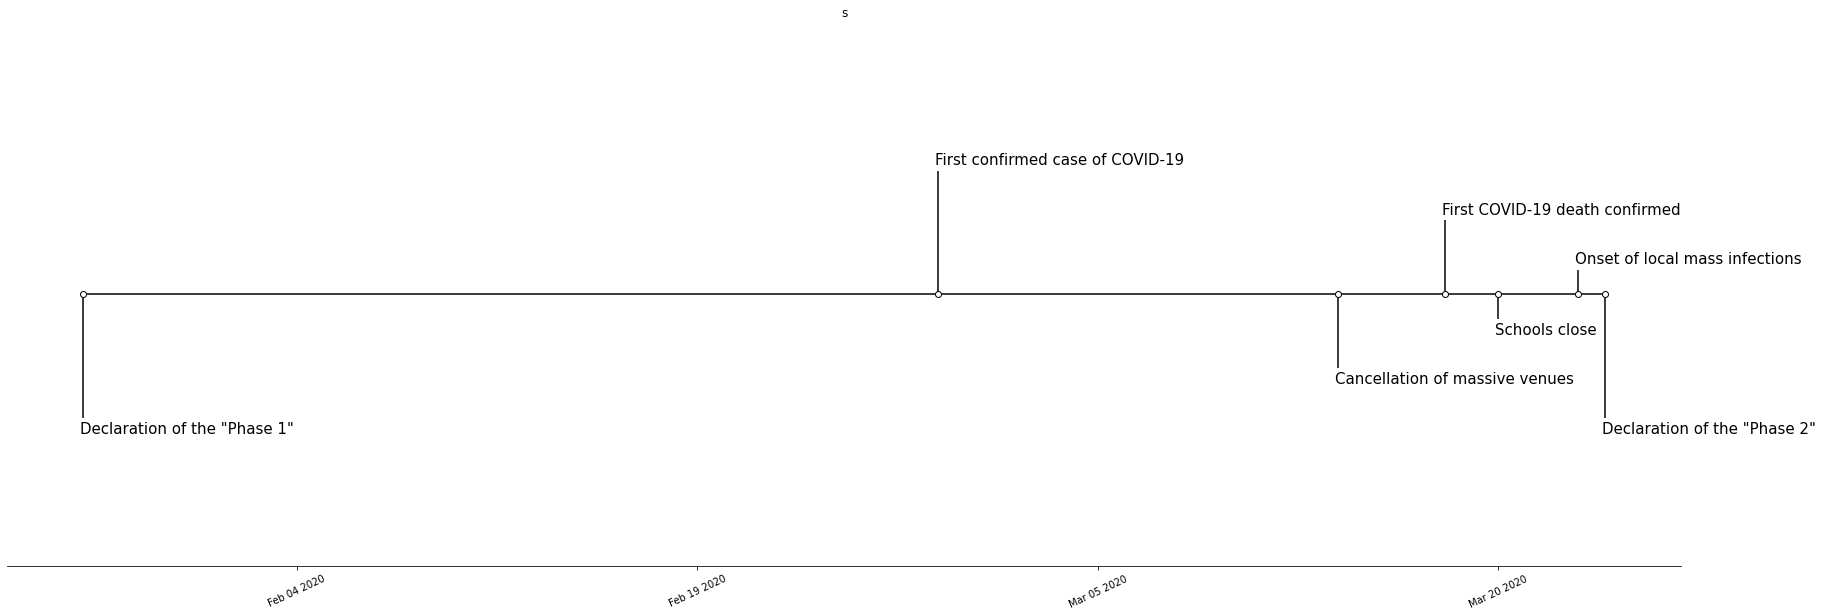

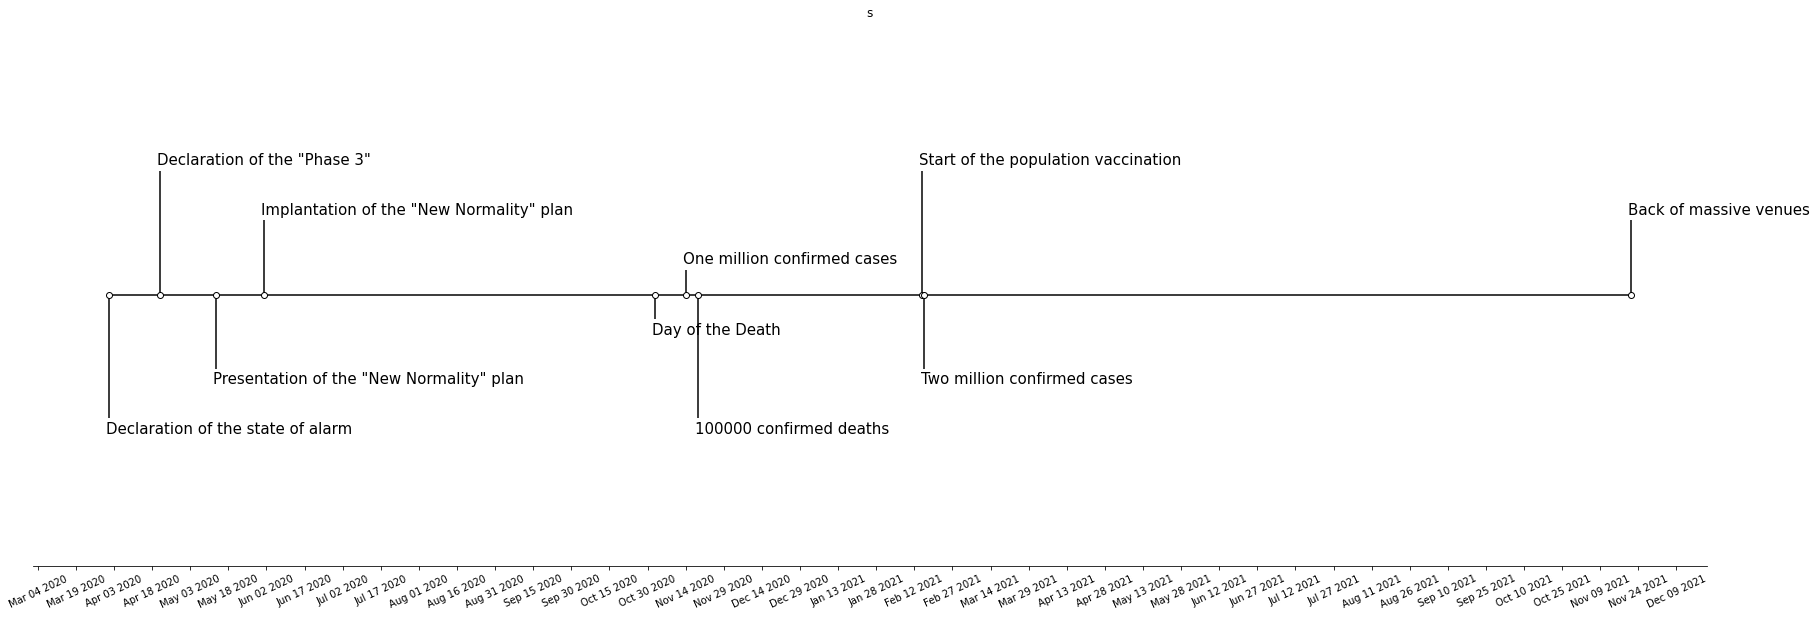

In [7]:
# Mexico

dates_mexico1, events_mexico1 = csv_import('mexico1.csv')
dates_mexico2, events_mexico2 = csv_import('mexico2.csv')
timeline(dates_mexico1, events_mexico1, 30, 10)
timeline(dates_mexico2, events_mexico2, 30, 10)

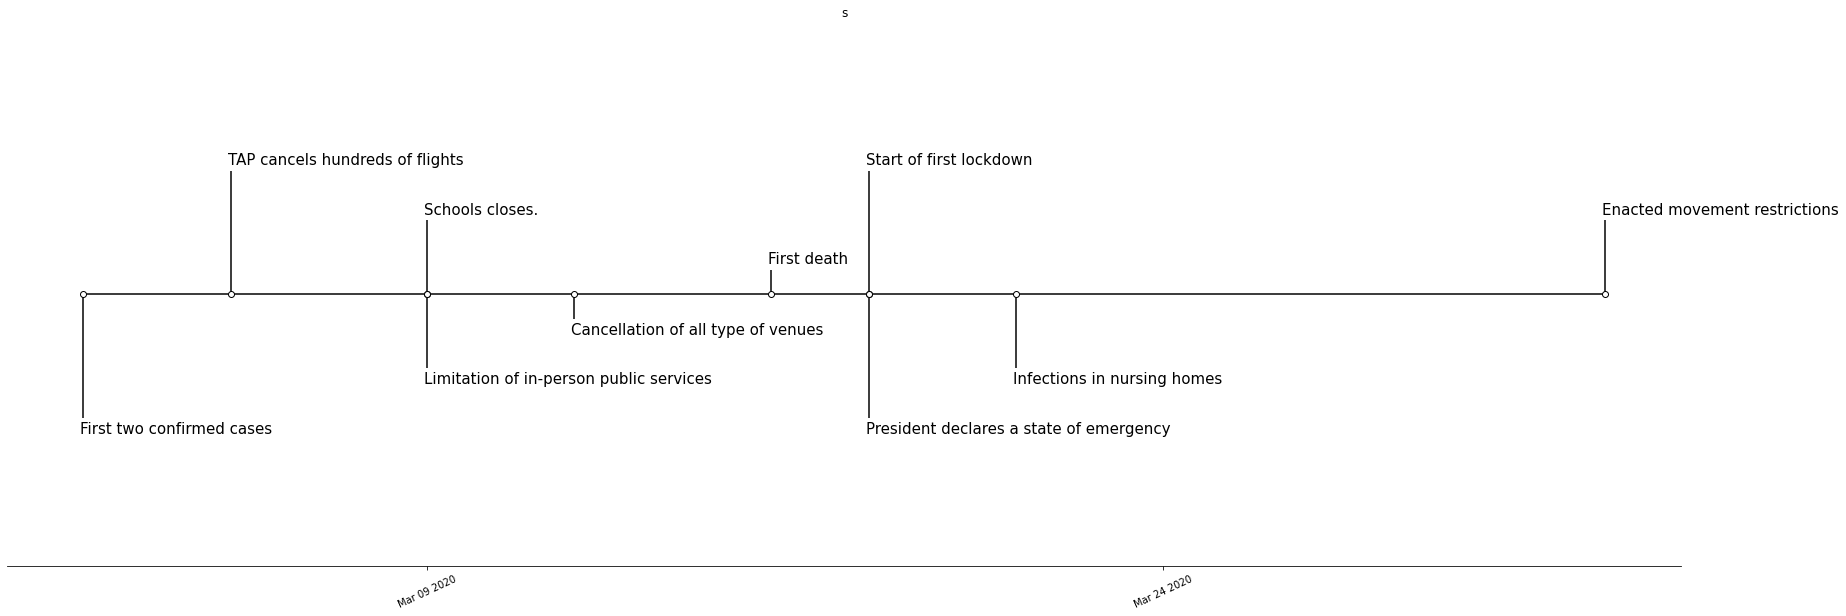

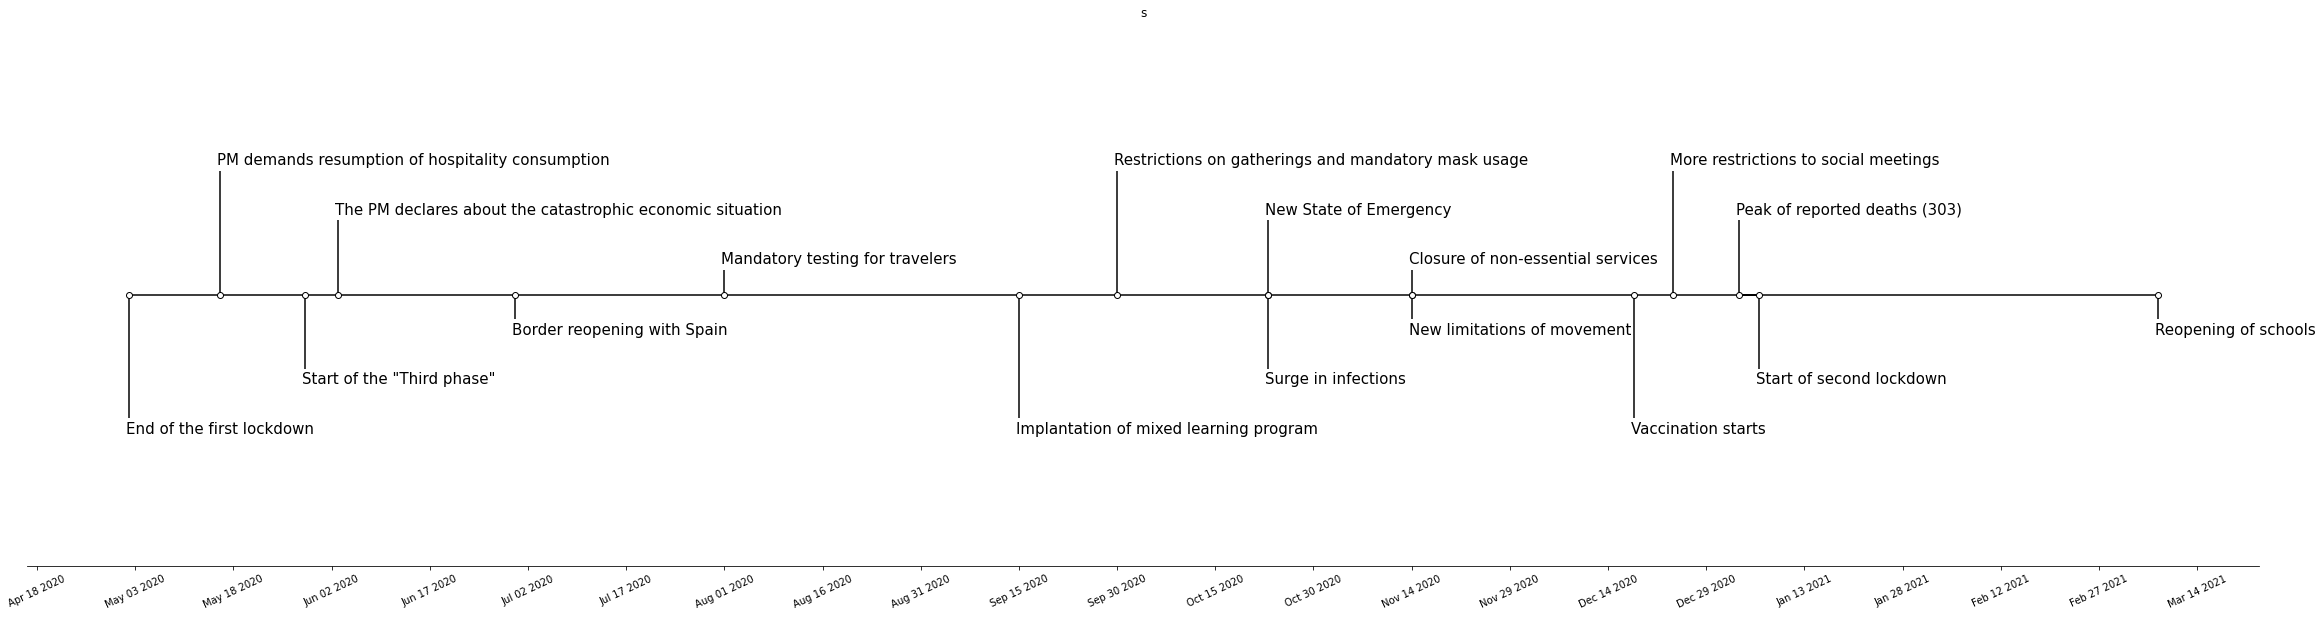

In [8]:
# Portugal

dates_pt1, events_pt1 = csv_import('portugal1.csv')
dates_pt2, events_pt2 = csv_import('pt2.csv')

timeline(dates_pt1, events_pt1, 30, 10)
timeline(dates_pt2, events_pt2, 40, 10)

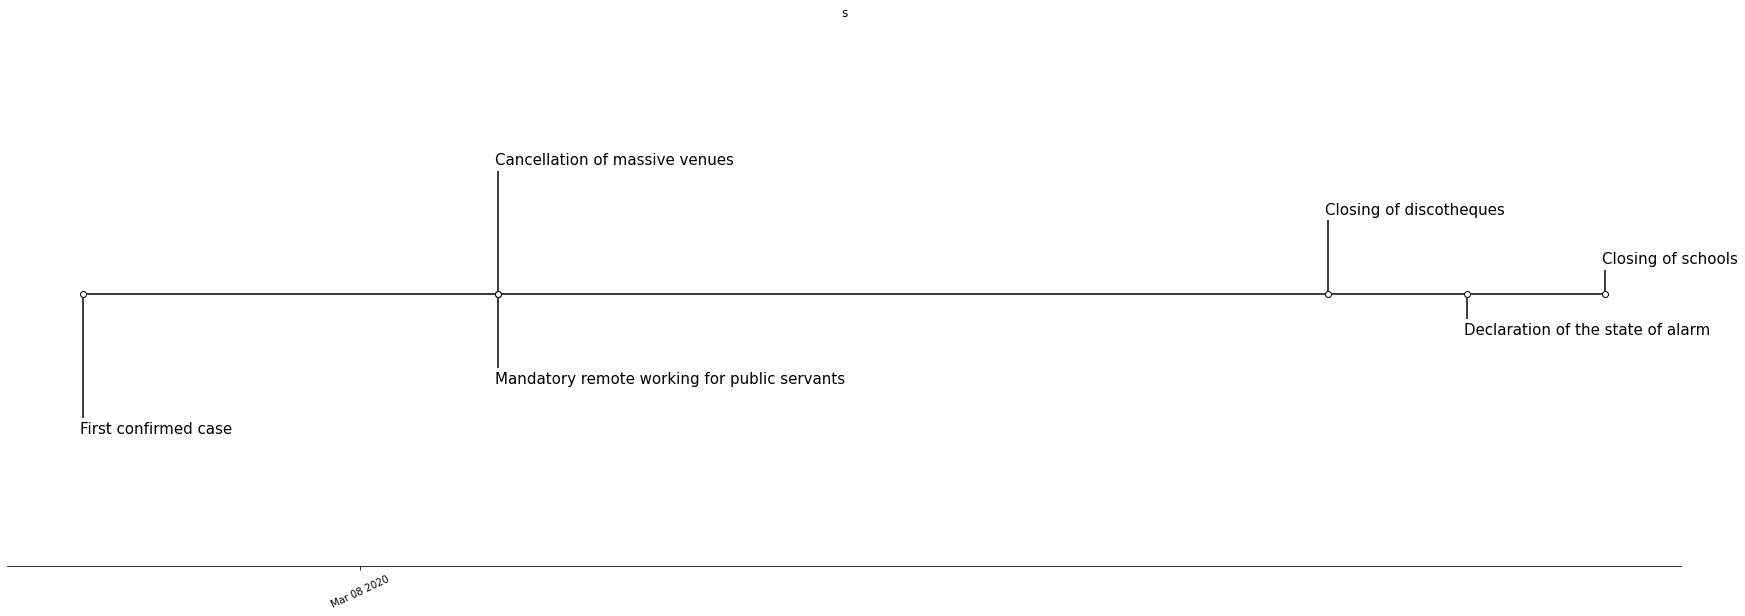

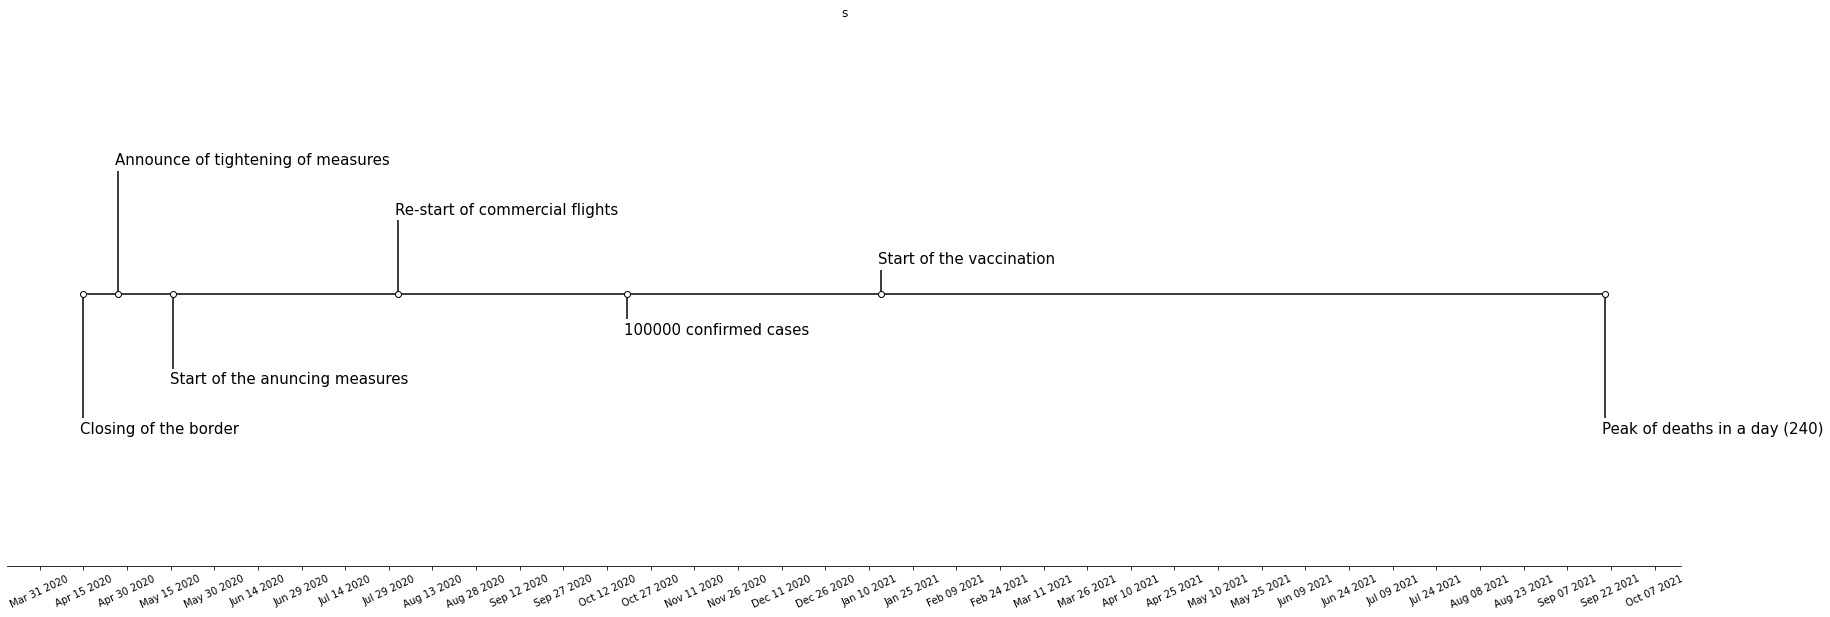

In [9]:
# Costa Rica

dates_cr1, events_cr1 = csv_import('CR1.csv')
dates_cr2, events_cr2 = csv_import('CR2.csv')
timeline(dates_cr1, events_cr1, 30, 10)
timeline(dates_cr2, events_cr2, 30, 10)

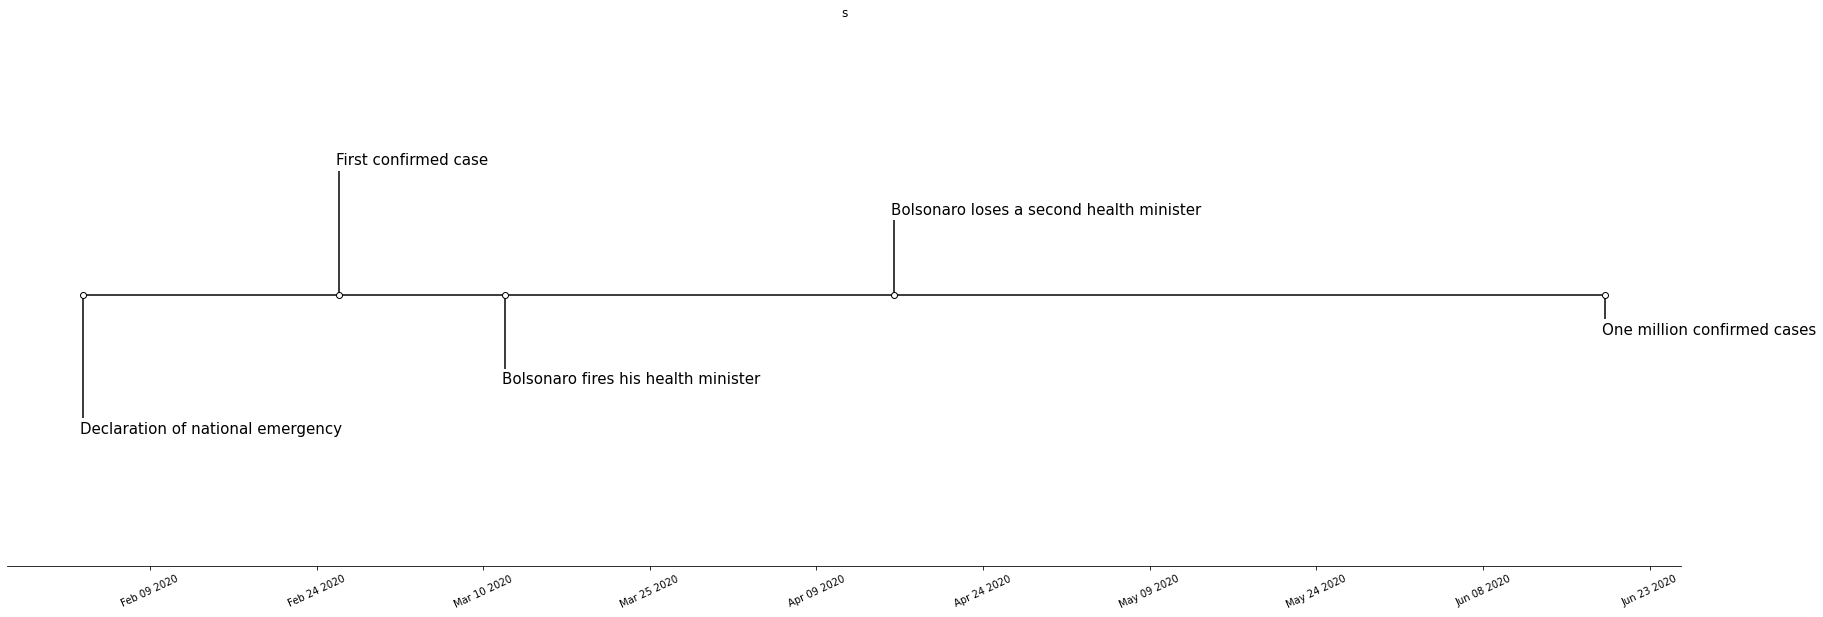

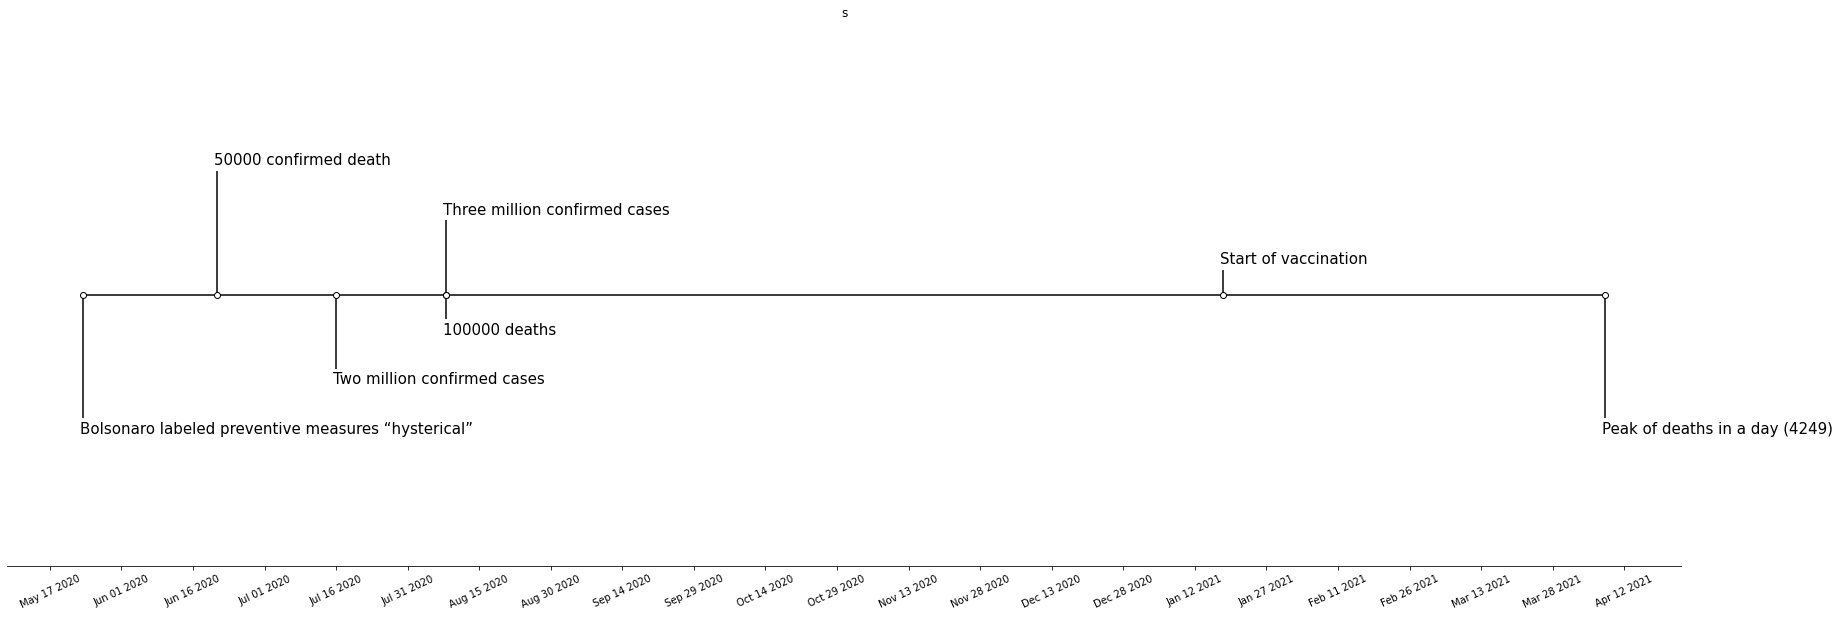

In [10]:
# Brasil

dates_br1, events_br1 = csv_import('Brasil1.csv')
dates_br2, events_br2 = csv_import('Brasil2.csv')
timeline(dates_br1, events_br1, 30, 10)
timeline(dates_br2, events_br2, 30, 10)

## Plotting Total Confirmed Cases and Deaths

In [11]:
world = pd.read_csv("world_covid_data.csv")

dfSpain = iso_filter(world, 'ESP')
dfPortugal = iso_filter(world, 'PRT')
dfBrazil = iso_filter(world, 'BRA')
dfCR = iso_filter(world, 'CRI')
dfMexico = iso_filter(world, 'MEX')

dfIberoamerican = pd.concat([dfSpain, dfPortugal, dfBrazil, dfCR, dfMexico])
dfIberoamerican = dfIberoamerican.reset_index(drop=True)

/opt/tljh/user/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


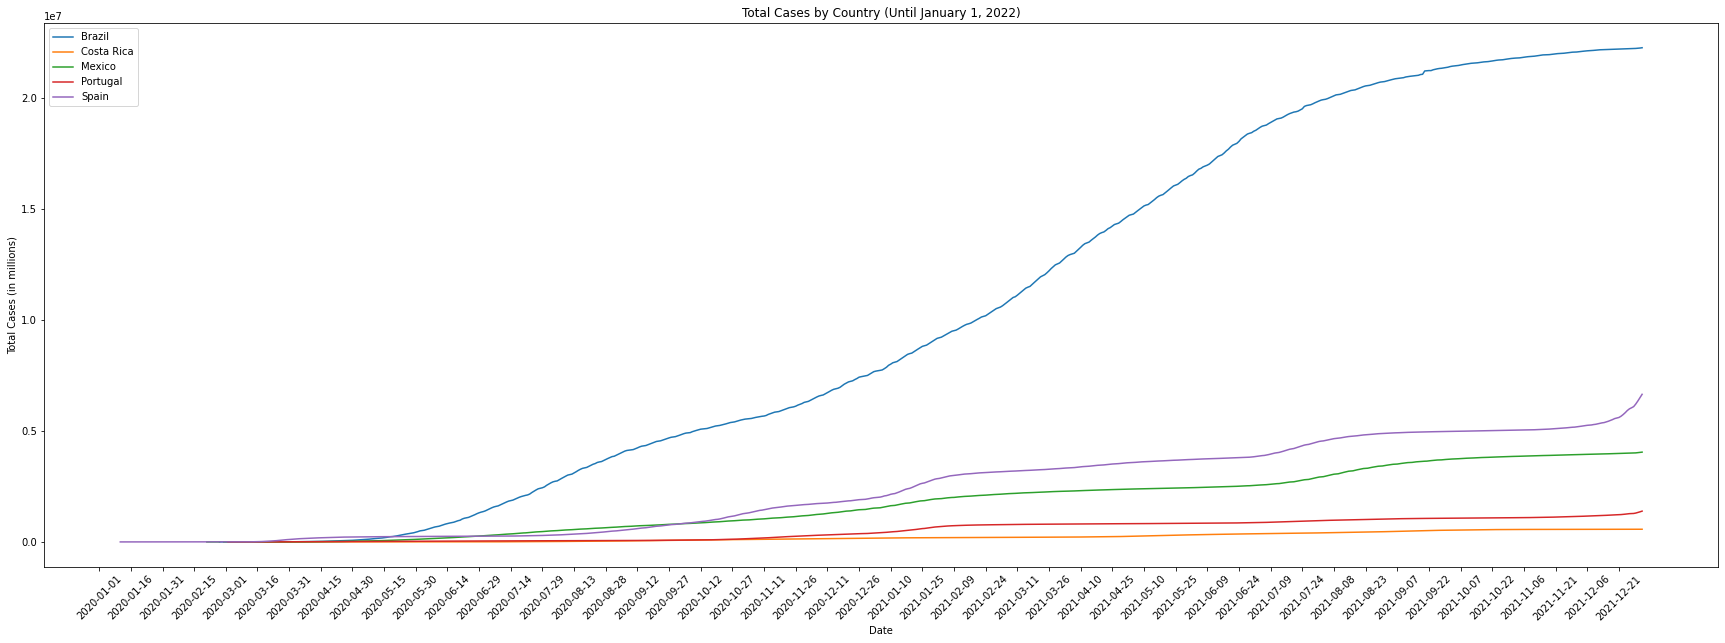

In [12]:
dfIberoamerican['date'] = pd.to_datetime(dfIberoamerican['date'])
filtered_df = dfIberoamerican[dfIberoamerican['date'] <= '2022-01-01']
grouped_filtered_df = filtered_df.groupby('location')['total_cases'].sum()

plt.figure(figsize=(30, 10))
for country in grouped_filtered_df.index:
    plt.plot(filtered_df[filtered_df['location'] == country]['date'], 
             filtered_df[filtered_df['location'] == country]['total_cases'], 
             label=country)

# Customize the plot
plt.title('Total Cases by Country (Until January 1, 2022)')
plt.xlabel('Date')
plt.ylabel('Total Cases (in millions)')
plt.legend(loc='upper left')

# Set x-axis tick labels for every 15th date
plt.xticks(pd.date_range(start=filtered_df['date'].min(), end=filtered_df['date'].max(), freq='15d'), rotation=45)

# Display the plot
plt.show()

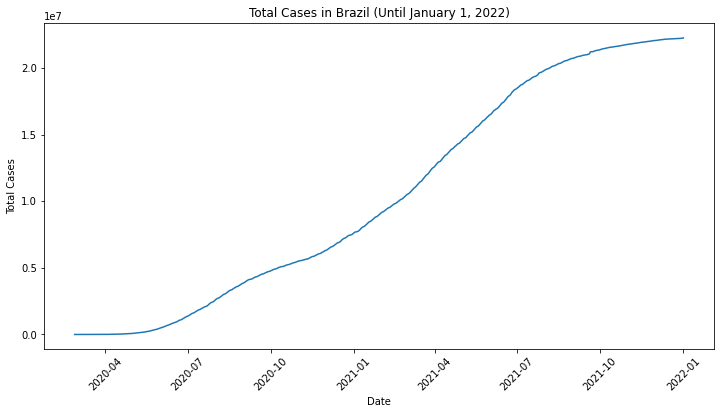

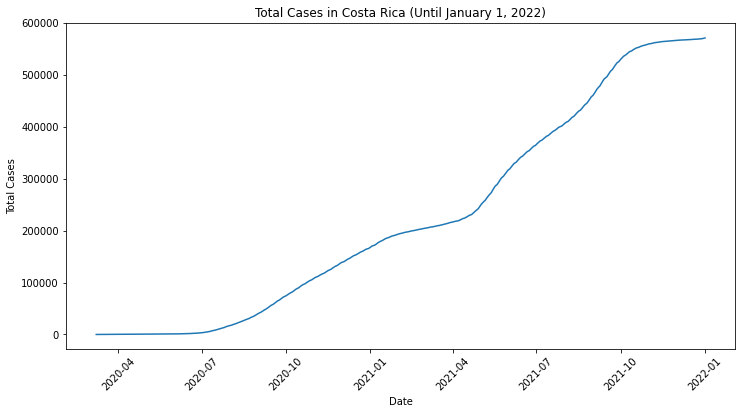

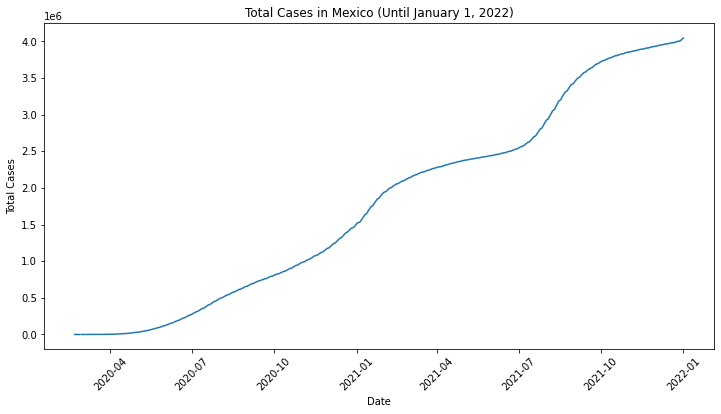

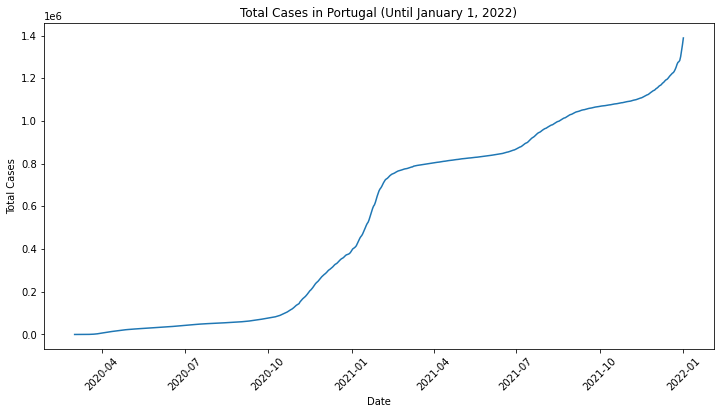

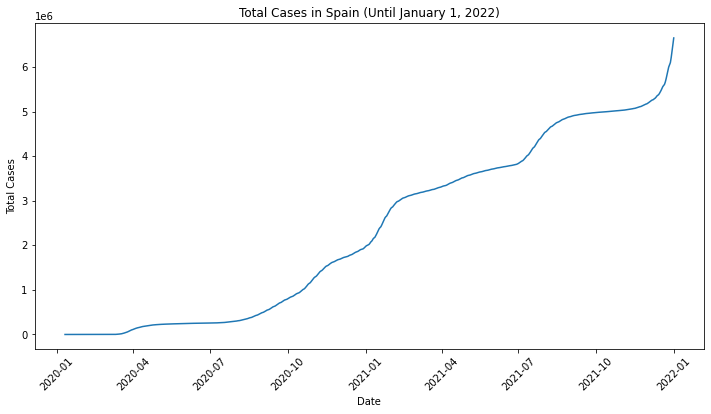

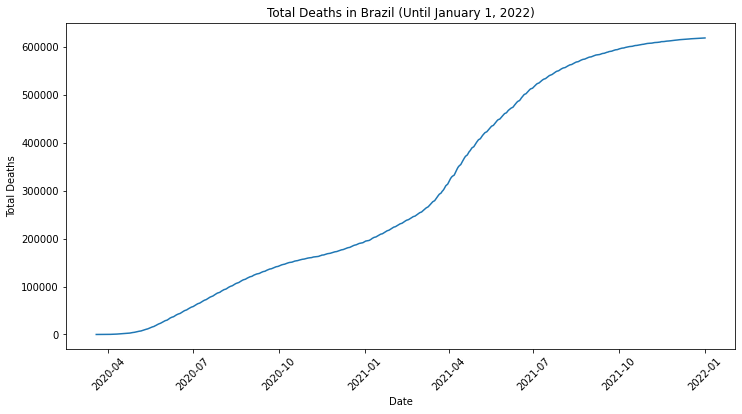

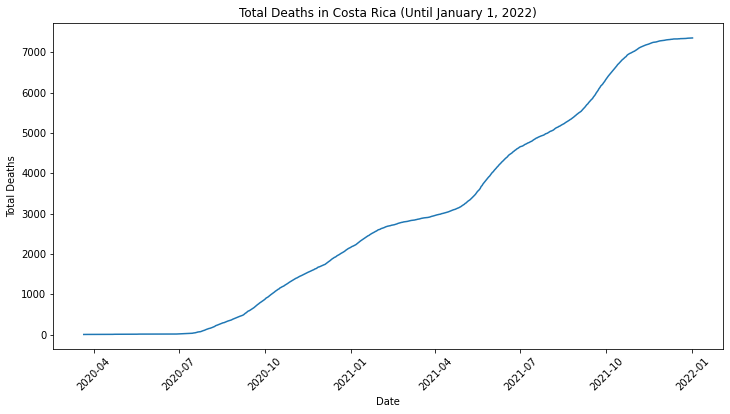

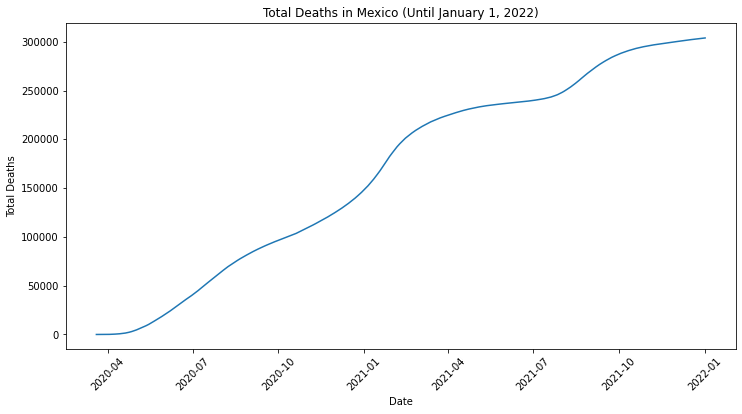

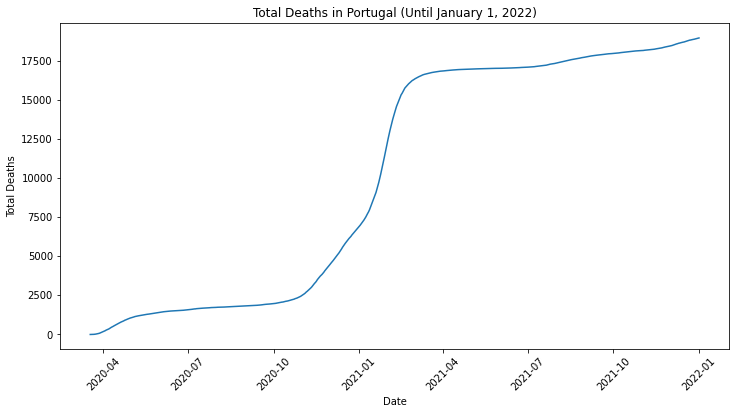

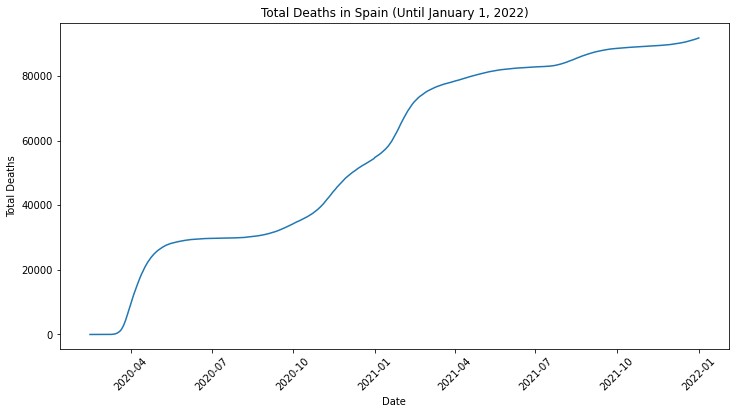

In [13]:
dfIberoamerican['date'] = pd.to_datetime(dfIberoamerican['date'])
filtered_df = dfIberoamerican[dfIberoamerican['date'] <= '2022-01-01']
grouped_filtered_df = filtered_df.groupby('location')

for country, country_df in grouped_filtered_df:
    plt.figure(figsize=(12, 6))
    plt.plot(country_df['date'], country_df['total_cases'])
    plt.title(f'Total Cases in {country} (Until January 1, 2022)')
    plt.xlabel('Date')
    plt.ylabel('Total Cases')
    plt.xticks(rotation=45)
    plt.show()
    
for country, country_df in grouped_filtered_df:
    plt.figure(figsize=(12, 6))
    plt.plot(country_df['date'], country_df['total_deaths'])
    plt.title(f'Total Deaths in {country} (Until January 1, 2022)')
    plt.xlabel('Date')
    plt.ylabel('Total Deaths')
    plt.xticks(rotation=45)
    plt.show()

Citation:

LEIROS GARCIA, Aura (2023). Spain COVID-19 Cronology Datasheet (1.0) [CSV file]. Retrieved from [URL or file location]
Based on: RTVE. (2021). "Cronología de la pandemia: un año desde el estado de alarma" [CSV file]. Retrieved from https://www.rtve.es/noticias/20210313/cronologia-pandemia-ano-desde-estado-alarma/2081800.shtml

MORALES HERRERA, Emilio; LEIROS GARCIA, Aura (2023). Mexico COVID-19 Cronology Datasheet(1.0) [CSV file]. Retrieved from URL. Based on: CIUDAD DE MEXICO. (2021). "‘Línea de tiempo COVID-19’; a un año del primer caso en México". Retrieved from https://www.capital21.cdmx.gob.mx/noticias/?p=12574

MORALES HERRERA, Emilio; LEIROS GARCIA, Aura (2023). Portugal COVID-19 Cronology Datasheet(1.0) [CSV file]. Retrieved from URL. Based on: ANTENA LIVRE. (2022). "Covid-19/Dois anos: Principais acontecimentos da pandemia em Portugal". Retrieved from https://www.antenalivre.pt/covid-19/covid-19-dois-anos-principais-acontecimentos-da-pandemia-em-portugal

## Code Documentation

1. csv_import

- Function that imports a csv file for manipulation with the timeline function.

    - csv_file : name of the csv file including the .csv extension

1. Timeline Function

- Function that creates a matplotlib timeline based in input parameters:

    - OPTIONAL 'title' : Includes a title to the timeline
    - 'dates' : dates obtained from the imported .csv file
    - 'events' : events obtainted from the imported .csv file
    - 'x_axis_size' : size in inches for the x-axis
    - 'y_axis_size' : size in inches for the y-axis
    - OPTIONAL 'font_size' : font size of the events
    - OPTIONAL 'title' : Includes a title to the timeline
    - OPTIONAL 'alignement' : Alignement of the events, choice between left, center and right.

    